# Animal Shelter EDA

## Import Relevant Libraries

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,8] #set default fig size
# pd.set_option('max_columns', None)
# pd.set_option('max_rows', None)
import cufflinks # !pip install ipywidgets
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from plotly.offline import iplot

## Data Importation and Cleaning

In [112]:
df = pd.read_excel('../data/EDA Instructions and Data.xlsx', sheet_name = 'Data')
df.shape

(22557, 34)

In [113]:
df.head()

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Tag Type,Activity Number,Activity Sequence,Source Id,Census Tract,...,Outcome Time,Receipt Number,Impound Number,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year
0,A0144701,DOG,HAVANESE,VT 12,IMPOUNDED,NaN,NaN,1,P0098773,6301,...,11:31:00,R19-558731,K19-486742,NaN,APP SICK,SCAN CHIP,OVER THE COUNTER,RETURNED TO OWNER,NOV.2019,FY2020
1,A0442587,DOG,TERRIER MIX,FREEZER,IMPOUNDED,NaN,NaN,1,P0492284,7102,...,00:00:00,NaN,K19-486954,NaN,DEAD,SCAN CHIP,OVER THE COUNTER,NaN,NOV.2019,FY2020
2,A0458972,DOG,CATAHOULA,RECEIVING,UNAVAILABLE,NaN,A19-195601,1,P9991718,4600,...,13:36:00,NaN,K19-482022,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,SWEEP,NaN,OCT.2019,FY2020
3,A0525642,DOG,GERM SHEPHERD,INJD 001,IMPOUNDED,NaN,A19-196573,1,P0903792,16605,...,17:35:00,NaN,K19-483073,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,SWEEP,TAGGED,OCT.2019,FY2020
4,A0565586,DOG,SILKY TERRIER,LFD 119,UNAVAILABLE,NaN,NaN,1,P0890077,6900,...,12:57:00,R19-558750,K19-486694,NaN,APP WNL,SCAN CHIP,OVER THE COUNTER,RETURNED TO OWNER,NOV.2019,FY2020


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22557 entries, 0 to 22556
Data columns (total 34 columns):
Animal Id                 22557 non-null object
Animal Type               22557 non-null object
Animal Breed              22557 non-null object
Kennel Number             22557 non-null object
Kennel Status             22557 non-null object
Tag Type                  0 non-null float64
Activity Number           11974 non-null object
Activity Sequence         22557 non-null int64
Source Id                 22557 non-null object
Census Tract              19799 non-null object
Council District          19799 non-null object
Intake Type               22557 non-null object
Intake Subtype            22557 non-null object
Intake Total              22557 non-null int64
Reason                    21229 non-null object
Staff Id                  22557 non-null object
Intake Date               22557 non-null datetime64[ns]
Intake Time               22557 non-null object
Due Out                 

In [115]:
# Specify columns to drop
dropped_cols = ['Tag Type','Activity Number','Activity Sequence','Source Id','Intake Total',
                'Reason','Staff Id','Hold Request','Receipt Number','Impound Number',
                'Service Request Number','Chip Status','Animal Origin','Additional Information']

df = df.drop(dropped_cols, axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22557 entries, 0 to 22556
Data columns (total 20 columns):
Animal Id            22557 non-null object
Animal Type          22557 non-null object
Animal Breed         22557 non-null object
Kennel Number        22557 non-null object
Kennel Status        22557 non-null object
Census Tract         19799 non-null object
Council District     19799 non-null object
Intake Type          22557 non-null object
Intake Subtype       22557 non-null object
Intake Date          22557 non-null datetime64[ns]
Intake Time          22557 non-null object
Due Out              22557 non-null datetime64[ns]
Intake Condition     22557 non-null object
Outcome Type         22557 non-null object
Outcome Subtype      22557 non-null object
Outcome Date         22190 non-null datetime64[ns]
Outcome Time         22557 non-null object
Outcome Condition    21019 non-null object
Month                22557 non-null object
Year                 22557 non-null object
dtypes:

In [8]:
# Check null values
df.isnull().sum()

Animal Id               0
Animal Type             0
Animal Breed            0
Kennel Number           0
Kennel Status           0
Census Tract         2758
Council District     2758
Intake Type             0
Intake Subtype          0
Intake Date             0
Intake Time             0
Due Out                 0
Intake Condition        0
Outcome Type            0
Outcome Subtype         0
Outcome Date          367
Outcome Time            0
Outcome Condition    1538
Month                   0
Year                    0
dtype: int64

In [9]:
df.head()

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Census Tract,Council District,Intake Type,Intake Subtype,Intake Date,Intake Time,Due Out,Intake Condition,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Outcome Condition,Month,Year
0,A0144701,DOG,HAVANESE,VT 12,IMPOUNDED,6301,4,OWNER SURRENDER,GENERAL,2019-11-08,15:48:00,2019-11-14,APP SICK,RETURNED TO OWNER,WALK IN,2019-11-09,11:31:00,APP SICK,NOV.2019,FY2020
1,A0442587,DOG,TERRIER MIX,FREEZER,IMPOUNDED,7102,2,OWNER SURRENDER,DEAD ON ARRIVAL,2019-11-10,14:18:00,2019-11-10,DEAD,DEAD ON ARRIVAL,DISPOSAL,2019-11-10,00:00:00,DEAD,NOV.2019,FY2020
2,A0458972,DOG,CATAHOULA,RECEIVING,UNAVAILABLE,4600,1,STRAY,AT LARGE,2019-10-03,11:08:00,2019-10-03,TREATABLE REHABILITABLE NON-CONTAGIOUS,RETURNED TO OWNER,FIELD,2019-10-03,13:36:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,OCT.2019,FY2020
3,A0525642,DOG,GERM SHEPHERD,INJD 001,IMPOUNDED,16605,8,OWNER SURRENDER,GENERAL,2019-10-11,09:55:00,2019-10-17,TREATABLE REHABILITABLE NON-CONTAGIOUS,TRANSFER,MEDICAL-CONTAGIOUS,2019-10-15,17:35:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,OCT.2019,FY2020
4,A0565586,DOG,SILKY TERRIER,LFD 119,UNAVAILABLE,6900,1,STRAY,AT LARGE,2019-11-08,11:55:00,2019-11-14,APP WNL,RETURNED TO OWNER,WALK IN,2019-11-09,12:57:00,APP WNL,NOV.2019,FY2020


## Some Data Exploration

It's good to explore entries that have missing values to determine why they might be missing.

In [10]:
# Let's explore what these null entries look like

# Identify columns with nulls
cols = df.columns[df.isnull().any()]
print(cols)

# Look at the table
df.loc[df['Outcome Condition'].isnull()].sample(5)
# many of these animals have been sheltered > 7 days w/ outcome type = ['LOST EXP', 'FOUND EXP', 'OTHER']

Index(['Census Tract', 'Council District', 'Outcome Date',
       'Outcome Condition'],
      dtype='object')


,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Census Tract,Council District,Intake Type,Intake Subtype,Intake Date,Intake Time,Due Out,Intake Condition,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Outcome Condition,Month,Year
16343,A1093994,DOG,AUST CATTLE DOG,LOST,IMPOUNDED,NaN,NaN,STRAY,WEB,2020-01-22,14:25:00,2020-01-22,NORMAL,LOST EXP,OTHER,2020-02-22,00:00:00,NaN,JAN.2020,FY2020
10886,A1089102,DOG,CANE CORSO,FOUND,IMPOUNDED,NaN,NaN,STRAY,WEB,2019-11-21,10:25:00,2019-11-22,NORMAL,FOUND EXP,OTHER,2019-12-23,00:00:00,NaN,NOV.2019,FY2020
2514,A1084205,DOG,GERM SHEPHERD,LOST,IMPOUNDED,NaN,NaN,STRAY,WEB,2019-10-01,11:25:00,2019-10-02,NORMAL,LOST EXP,OTHER,2019-11-02,00:00:00,NaN,OCT.2019,FY2020
22530,A1100954,DOG,PIT BULL,QD 06,UNAVAILABLE,20200,8,OWNER SURRENDER,QUARANTINE,2020-05-08,20:54:00,2020-05-08,APP WNL,OTHER,OTHER,NaT,00:00:00,NaN,MAY.2020,FY2020
5129,A1086677,DOG,RAT TERRIER,LOST,IMPOUNDED,NaN,NaN,STRAY,WEB,2019-10-23,12:25:00,2019-10-26,NORMAL,LOST EXP,OTHER,2019-11-26,00:00:00,NaN,OCT.2019,FY2020


In [11]:
df.loc[df['Outcome Date'].isnull()].sample(5)
# These animals most likely still at shelter

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Census Tract,Council District,Intake Type,Intake Subtype,Intake Date,Intake Time,Due Out,Intake Condition,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Outcome Condition,Month,Year
21234,A1100148,DOG,PIT BULL,LOST,IMPOUNDED,NaN,NaN,STRAY,WEB,2020-04-19,06:25:00,2020-04-21,NORMAL,OTHER,OTHER,NaT,00:00:00,NaN,APR.2020,FY2020
19749,A1099911,DOG,GERM SHEPHERD,LOST,IMPOUNDED,NaN,NaN,STRAY,WEB,2020-04-13,22:25:00,2020-04-14,NORMAL,OTHER,OTHER,NaT,00:00:00,NaN,APR.2020,FY2020
22554,A1100905,DOG,LABRADOR RETR,LFSD 11,IMPOUNDED,7302,13,STRAY,AT LARGE,2020-05-07,21:04:00,2020-05-11,APP WNL,ADOPTION,TELEADOPT,NaT,00:00:00,APP WNL,MAY.2020,FY2020
22463,A0898761,DOG,PIT BULL,LFD 106,IMPOUNDED,20500,6,STRAY,OTC,2020-05-08,11:41:00,2020-05-08,APP WNL,OTHER,OTHER,NaT,00:00:00,NaN,MAY.2020,FY2020
21960,A1100594,DOG,PIT BULL,QD 29,UNAVAILABLE,12800,9,CONFISCATED,QUARANTINE,2020-05-01,05:31:00,2020-05-10,APP INJ,OTHER,OTHER,NaT,00:00:00,NaN,MAY.2020,FY2020


In [12]:
# Sanity check
print(df['Outcome Date'].sort_values(ascending=False).head())
# latest date is 5/8/20

22424   2020-05-08
22434   2020-05-08
22475   2020-05-08
22467   2020-05-08
22466   2020-05-08
Name: Outcome Date, dtype: datetime64[ns]


In [13]:
df.loc[df['Census Tract'].isnull()].sample(5)

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Census Tract,Council District,Intake Type,Intake Subtype,Intake Date,Intake Time,Due Out,Intake Condition,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Outcome Condition,Month,Year
16105,A1096261,DOG,PIT BULL,LOST,IMPOUNDED,NaN,NaN,STRAY,WEB,2020-02-15,18:25:00,2020-02-17,NORMAL,LOST EXP,OTHER,2020-03-19,00:00:00,NaN,FEB.2020,FY2020
5175,A1086716,CAT,DOMESTIC LH,FOUND,IMPOUNDED,NaN,NaN,STRAY,WEB,2019-10-26,16:25:00,2019-10-26,NORMAL,FOUND EXP,OTHER,2019-11-26,00:00:00,NaN,OCT.2019,FY2020
18469,A1074435,CAT,DOMESTIC SH,PSCAT 07,UNAVAILABLE,NaN,NaN,OWNER SURRENDER,ALUMNI,2020-03-10,12:49:00,2020-03-10,APP WNL,ADOPTION,EAC,2020-03-12,13:53:00,APP WNL,MAR.2020,FY2020
18220,A1095691,DOG,PIT BULL,LOST,IMPOUNDED,NaN,NaN,STRAY,WEB,2020-02-10,18:25:00,2020-02-10,NORMAL,LOST EXP,OTHER,2020-03-12,00:00:00,NaN,FEB.2020,FY2020
20338,A1098736,DOG,GREAT DANE,FOUND,IMPOUNDED,NaN,NaN,STRAY,WEB,2020-03-15,23:25:00,2020-03-16,NORMAL,FOUND EXP,OTHER,2020-04-16,00:00:00,NaN,MAR.2020,FY2020


In [14]:
df.loc[df['Council District'].isnull()].sample(5)

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Census Tract,Council District,Intake Type,Intake Subtype,Intake Date,Intake Time,Due Out,Intake Condition,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Outcome Condition,Month,Year
21825,A1100539,DOG,PIT BULL,LOST,IMPOUNDED,NaN,NaN,STRAY,WEB,2020-04-25,17:25:00,2020-04-29,NORMAL,OTHER,OTHER,NaT,00:00:00,NaN,APR.2020,FY2020
5552,A1087068,DOG,YORKSHIRE TERR,LOST,IMPOUNDED,NaN,NaN,STRAY,WEB,2019-10-14,14:25:00,2019-10-30,NORMAL,LOST EXP,OTHER,2019-11-30,00:00:00,NaN,OCT.2019,FY2020
15832,A1097592,DOG,DACHSHUND,LFSD 11,UNAVAILABLE,NaN,NaN,OWNER SURRENDER,GENERAL,2020-03-04,15:40:00,2020-03-05,APP WNL,TRANSFER,GENERAL,2020-03-05,14:40:00,APP WNL,MAR.2020,FY2020
16440,A1095351,CAT,DOMESTIC SH,CC 27,AVAILABLE,NaN,NaN,OWNER SURRENDER,GENERAL,2020-02-06,11:47:00,2020-02-06,APP WNL,FOSTER,GENERAL,2020-02-07,16:16:00,UNKNOWN,FEB.2020,FY2020
16519,A1096254,CAT,AMER SH,LOST,IMPOUNDED,NaN,NaN,STRAY,WEB,2020-02-17,17:25:00,2020-02-17,NORMAL,LOST EXP,OTHER,2020-03-19,00:00:00,NaN,FEB.2020,FY2020


In [15]:
# Check if the missing values for 'Council District' and 'Census Tract' occur within the same records
temp_df1 = df.loc[df['Council District'].isnull()]
temp_df2 = df.loc[df['Census Tract'].isnull()]

temp_df1.equals(temp_df2) # yes

True

## Univariate Analysis - "The Big Picture"

### Types of Animals

Types of Animals:  ['DOG', 'CAT', 'BIRD', 'WILDLIFE', 'LIVESTOCK'] 

DOG          16617
CAT           5143
WILDLIFE       671
BIRD           111
LIVESTOCK       15
Name: Animal Type, dtype: int64


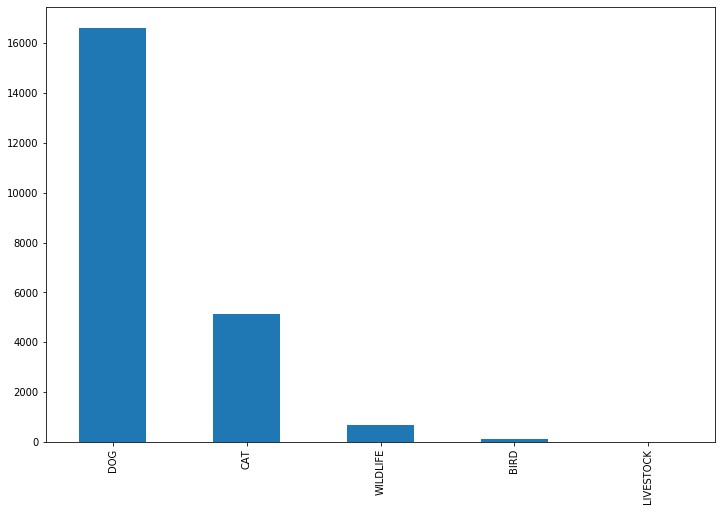

In [92]:
# Explore the Animal Type field

# List unique categories
print('Types of Animals: ', list(df['Animal Type'].unique()), '\n')

# Frequency counts
print(df['Animal Type'].value_counts())

# simple bar chart
df['Animal Type'].value_counts().plot.bar()

# df['Animal Type'].value_counts().iplot(
#     kind='bar', xTitle='Count', linecolor='black', orientation='v', color='blue', title='Distribution of Animal Types')

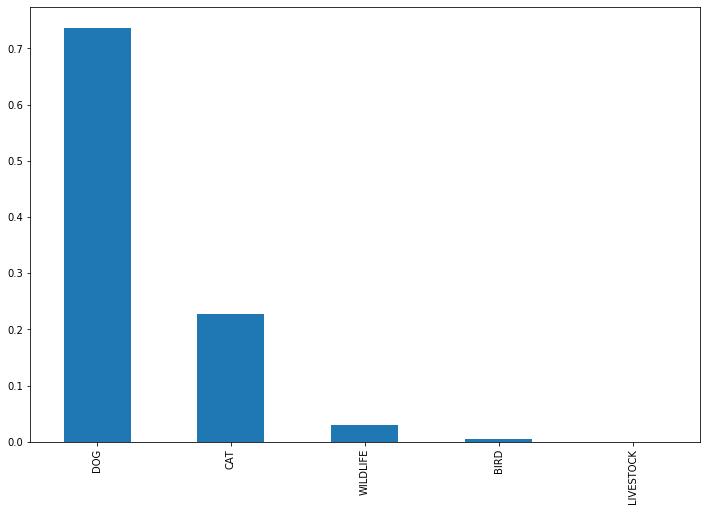

In [146]:
df['Animal Type'].value_counts(normalize=True).plot.bar()

~75% of animals taken to shelters are dogs, followed by cats (~23%).

### Location of Events

In [18]:
print('Total Census Tracts: ',len(df['Census Tract'].unique()))
print('Total Council Districts: ',len(df['Council District'].unique()))

Total Census Tracts:  312
Total Council Districts:  17


#### Census Tracts

Top Census Tracts with Events Occuring: 

20500    3684
11900     241
11602     237
17102     236
8802      220
11701     218
11800     218
10601     215
9201      208
17004     203
Name: Census Tract, dtype: int64


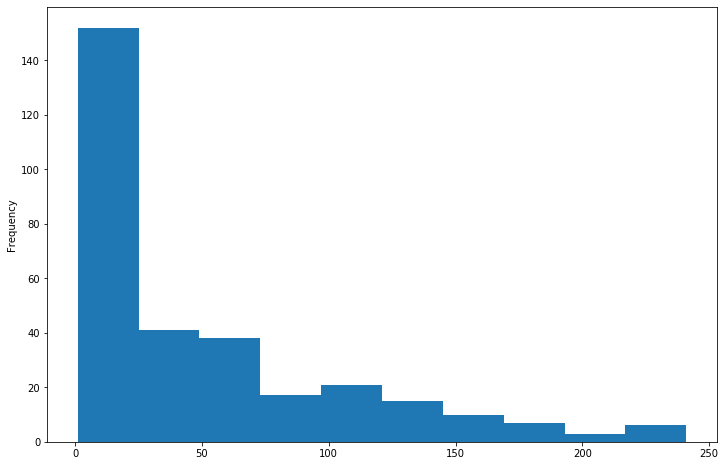

In [95]:
# Explore frequency of animal rescues by census tracts
print('Top Census Tracts with Events Occuring:', '\n')
print(df['Census Tract'].value_counts().sort_values(ascending=False).head(10))

tract_freq = df['Census Tract'].value_counts()
tract_freq.loc[tract_freq<250].plot(kind='hist')
# df['Animal Type'].value_counts().plot.bar()

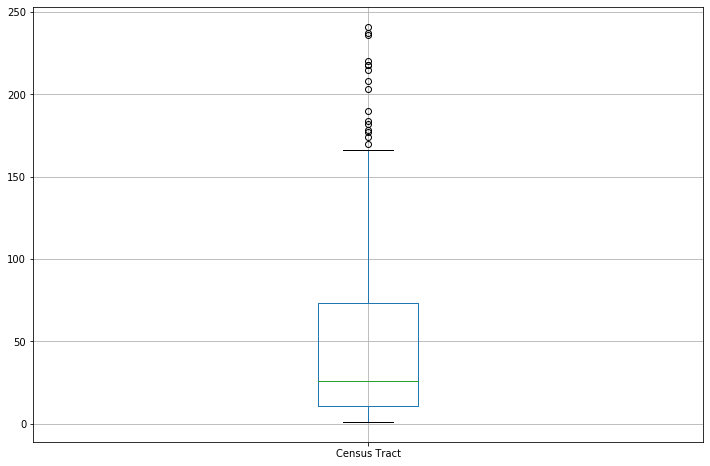

In [96]:
# Alternatively
tract_freq.loc[tract_freq<250].to_frame().boxplot()

What stands out here is that 75% of census tracts have fewer than 75 cases, while census tract 20500 is a clear outlier with 3684 cases.

#### Council Districts

In [21]:
district_freq = df['Council District'].value_counts().drop(labels=['AS',0])
district_freq

6     5158
4     2404
8     2238
5     2069
7     1609
1     1436
3     1413
2      869
9      751
10     456
14     392
13     392
11     347
12     250
Name: Council District, dtype: int64

#### Frequency of Events by Council District

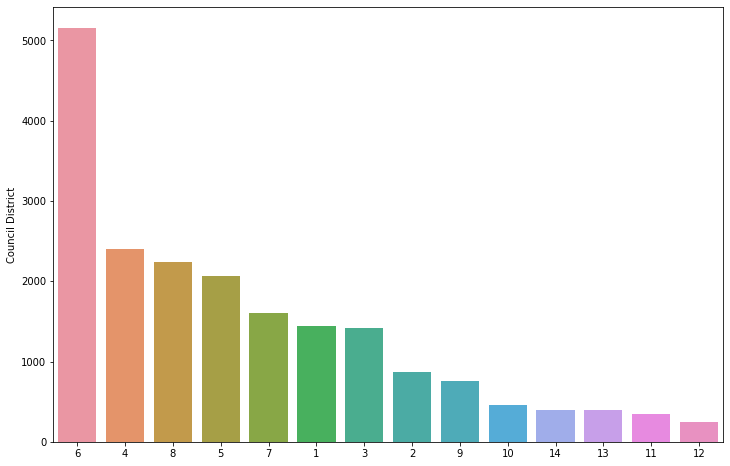

In [97]:
sns.barplot(x=district_freq.index, y = district_freq, order=district_freq.index)

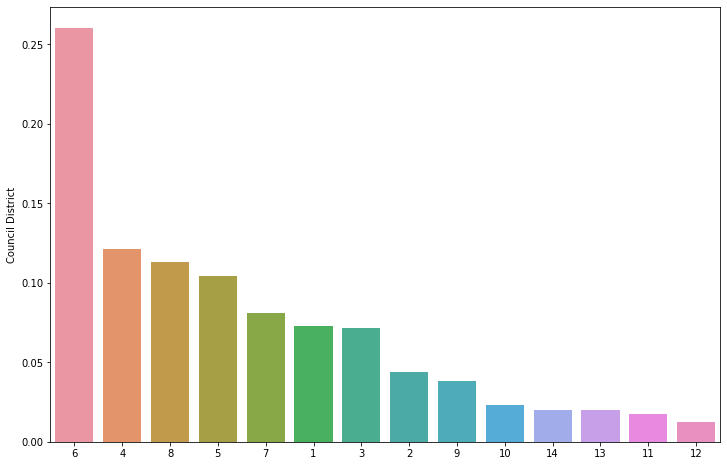

In [98]:
trace = df['Council District'].value_counts(normalize=True).drop(labels=['AS',0])

sns.barplot(x=district_freq.index, y = trace, order=district_freq.index)

District 6 has the highest frequency of animal shelter intakes (~26%).

### Intake Type

In [24]:
print('Total Intake Types: ', len(df['Intake Type'].unique()))
intake_freq = df['Intake Type'].value_counts()
intake_freq

Total Intake Types:  9


STRAY              13010
OWNER SURRENDER     4500
FOSTER              2414
CONFISCATED          865
TREATMENT            843
WILDLIFE             532
TRANSFER             350
KEEPSAFE              33
DISPOS REQ            10
Name: Intake Type, dtype: int64

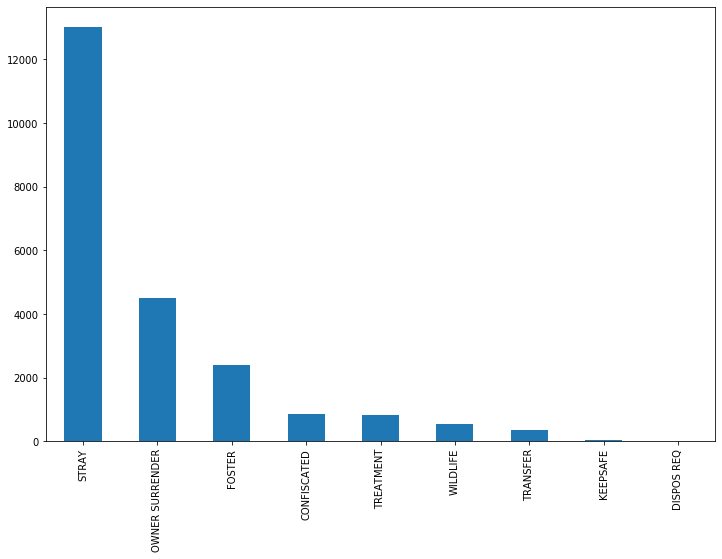

In [99]:
df['Intake Type'].value_counts().plot.bar()

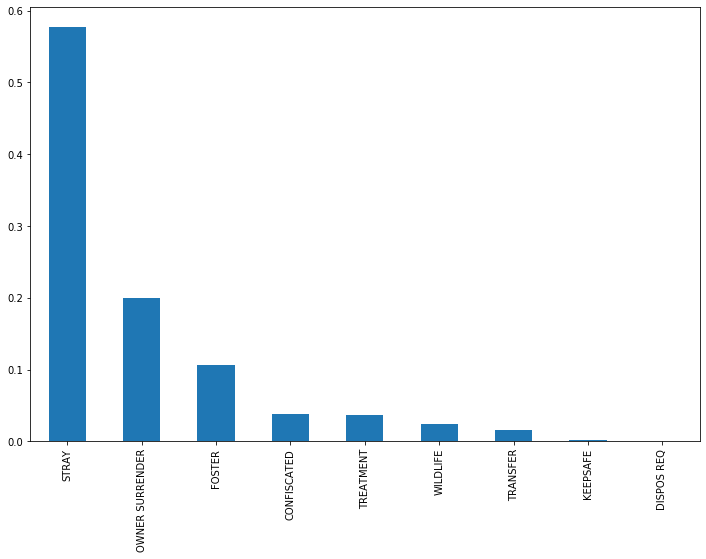

In [100]:
df['Intake Type'].value_counts(normalize=True).plot.bar()

We can see that the majority of shelter animals are strays (~57%). With ~80% being strays or surrendered animals.

### Intake Date

When are these events occurring during the year?
Aggregate by day/week/month/year. Explore popular days of the week.

In [32]:
df.head()

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Census Tract,Council District,Intake Type,Intake Subtype,Intake Date,Intake Time,Due Out,Intake Condition,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Outcome Condition,Month,Year
0,A0144701,DOG,HAVANESE,VT 12,IMPOUNDED,6301,4,OWNER SURRENDER,GENERAL,2019-11-08,15:48:00,2019-11-14,APP SICK,RETURNED TO OWNER,WALK IN,2019-11-09,11:31:00,APP SICK,NOV.2019,FY2020
1,A0442587,DOG,TERRIER MIX,FREEZER,IMPOUNDED,7102,2,OWNER SURRENDER,DEAD ON ARRIVAL,2019-11-10,14:18:00,2019-11-10,DEAD,DEAD ON ARRIVAL,DISPOSAL,2019-11-10,00:00:00,DEAD,NOV.2019,FY2020
2,A0458972,DOG,CATAHOULA,RECEIVING,UNAVAILABLE,4600,1,STRAY,AT LARGE,2019-10-03,11:08:00,2019-10-03,TREATABLE REHABILITABLE NON-CONTAGIOUS,RETURNED TO OWNER,FIELD,2019-10-03,13:36:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,OCT.2019,FY2020
3,A0525642,DOG,GERM SHEPHERD,INJD 001,IMPOUNDED,16605,8,OWNER SURRENDER,GENERAL,2019-10-11,09:55:00,2019-10-17,TREATABLE REHABILITABLE NON-CONTAGIOUS,TRANSFER,MEDICAL-CONTAGIOUS,2019-10-15,17:35:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,OCT.2019,FY2020
4,A0565586,DOG,SILKY TERRIER,LFD 119,UNAVAILABLE,6900,1,STRAY,AT LARGE,2019-11-08,11:55:00,2019-11-14,APP WNL,RETURNED TO OWNER,WALK IN,2019-11-09,12:57:00,APP WNL,NOV.2019,FY2020


In [39]:
df.groupby('Intake Date').count().head().iloc[:,0]

Intake Date
2019-10-01    135
2019-10-02    119
2019-10-03    135
2019-10-04    156
2019-10-05    149
Name: Animal Id, dtype: int64

#### Daily Frequency

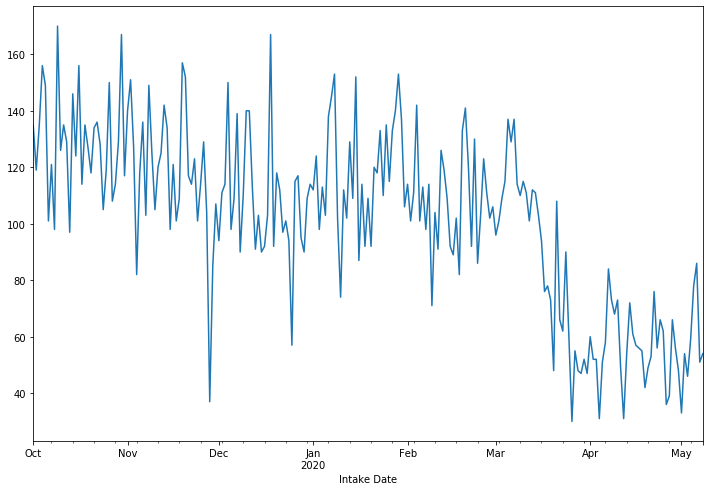

In [101]:
df.groupby('Intake Date').count().iloc[:,0].plot()

#### Monthly Frequency

In [54]:
# Truncate yyyy-mm-dd to yyyy-mm
df['Intake Date Month']=df['Intake Date'].dt.to_period('m').dt.to_timestamp()

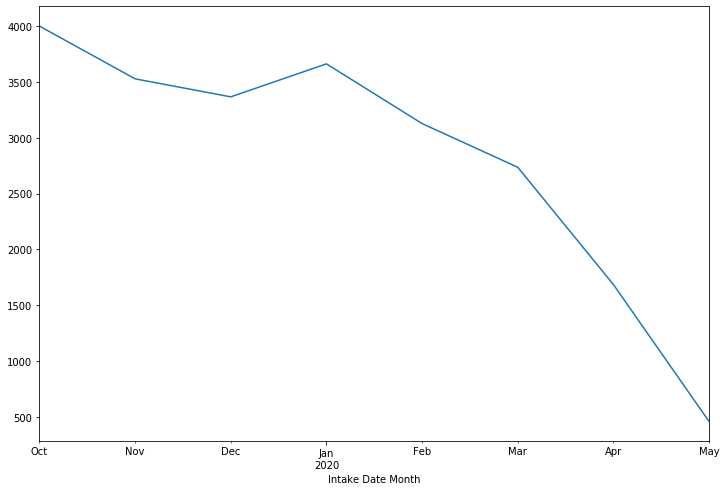

In [102]:
df.groupby('Intake Date Month').count().iloc[:,0].plot()

There is a steady decline in cases over the fiscal year. Possibly due to COVID!

#### Frequency by Day of the Week

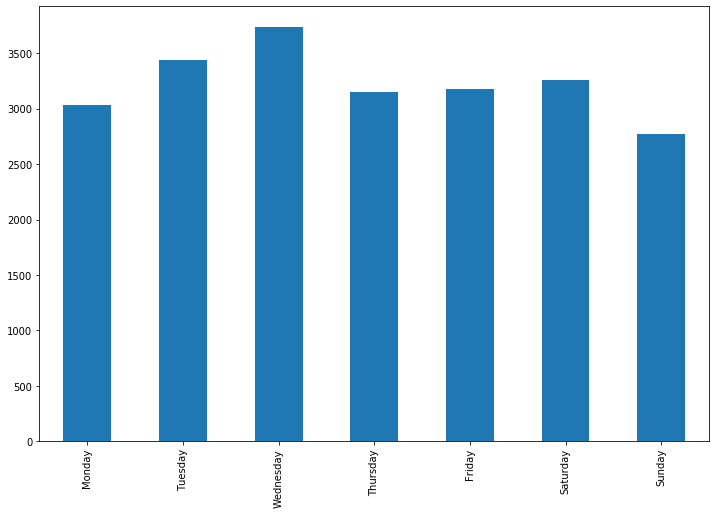

In [84]:
# Create a new 'day of the week' column
df['Day of the Week'] = df['Intake Date'].dt.day_name()

trace2 = df['Day of the Week'].value_counts().reindex(
    index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig=plt.figure(figsize=(12,8))
trace2.plot.bar()

No clear indication of day of the week differences. Can perform hypothesis testing to validate further.

### Time Spent at Shelter

How long do these animals stay at the shelter?

In [121]:
# Create new 'time at shelter' column
df['Time at Shelter'] = (df['Outcome Date']-df['Intake Date']).astype('timedelta64[D]')

Descriptive Statistics:

In [143]:
df['Time at Shelter'].dropna().describe()

count    22190.000000
mean         5.543758
std          9.850340
min          0.000000
25%          0.000000
50%          2.000000
75%          6.000000
max        140.000000
Name: Time at Shelter, dtype: float64

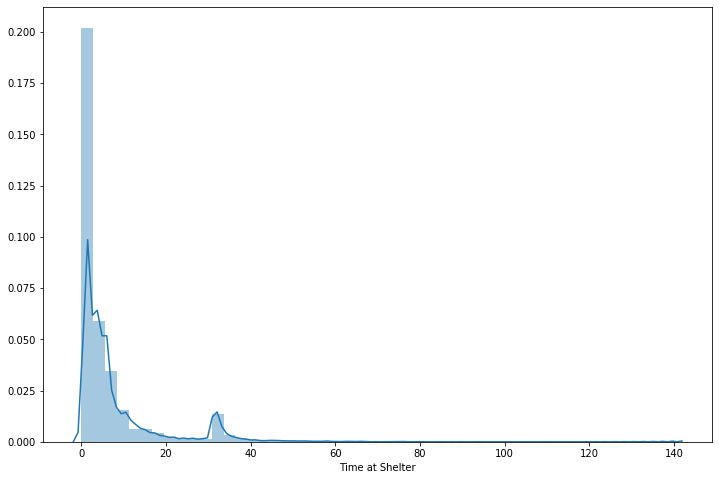

In [122]:
sns.distplot(df['Time at Shelter'].dropna())

Slight bimodal distribution with a separate peak at around ~30 days.

#### Segmenting by Intake Type

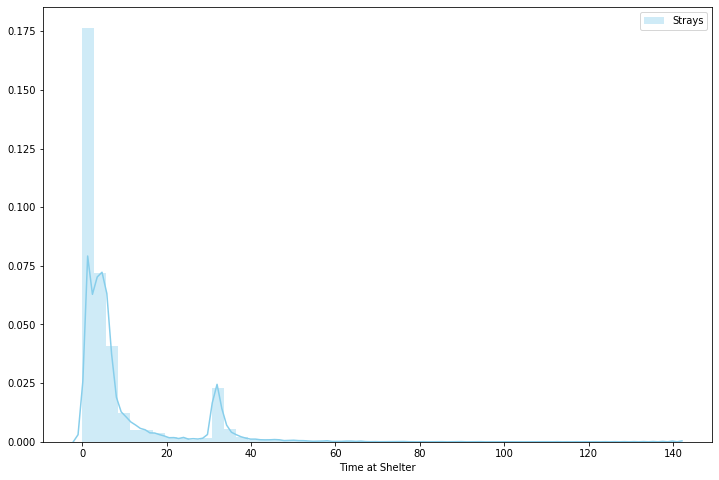

In [140]:
sns.distplot(df.loc[df['Intake Type']=='STRAY']['Time at Shelter'].dropna() , color="skyblue", label="Strays")
plt.legend()

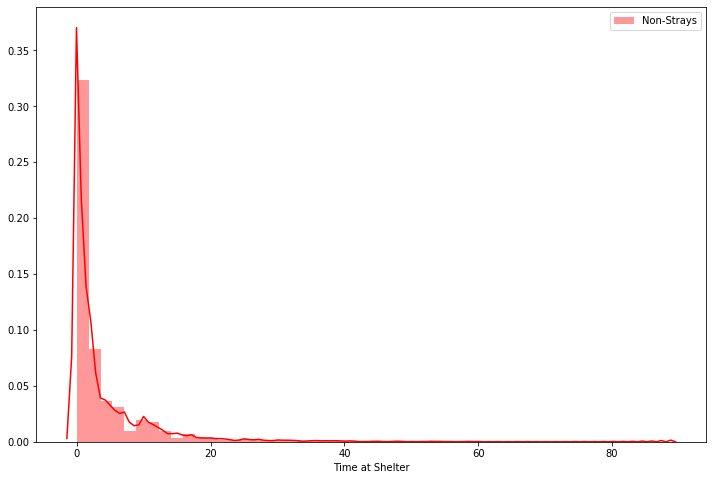

In [145]:
sns.distplot(df.loc[df['Intake Type']!='STRAY']['Time at Shelter'].dropna() , color="red", label="Non-Strays")
plt.legend()

Stray animals account for much of the bimodal distribution. The distribution is also less skewed to the right, with stray animals staying at the shelter for longer than other animals.

### Intake Condition

In [150]:
print('Total Intake Conditions: ', len(df['Intake Condition'].unique()))
df['Intake Condition'].unique()

array(['APP SICK', 'DEAD', 'TREATABLE REHABILITABLE NON-CONTAGIOUS',
       'APP WNL', 'UNHEALTHY UNTREATABLE NON-CONTAGIOUS', 'CRITICAL',
       'APP INJ', 'UNKNOWN', 'UNHEALTHY UNTREATABLE CONTAGIOUS',
       'TREATABLE MANAGEABLE NON-CONTAGIOUS', 'NORMAL',
       'TREATABLE MANAGEABLE CONTAGIOUS', 'HEALTHY',
       'TREATABLE REHABILITABLE CONTAGIOUS', 'UNDERAGE', 'FATAL',
       'DECEASED'], dtype=object)

In [148]:
intake_cond = df['Intake Condition'].value_counts()
intake_cond

# APP WNL = Within Normal Limits
# APP INJ = Injured

Total Intake Conditions:  17


APP WNL                                   14082
TREATABLE REHABILITABLE NON-CONTAGIOUS     3255
NORMAL                                     1328
UNKNOWN                                     980
APP SICK                                    830
APP INJ                                     757
UNDERAGE                                    535
CRITICAL                                    187
UNHEALTHY UNTREATABLE NON-CONTAGIOUS        150
DEAD                                        145
HEALTHY                                     115
TREATABLE MANAGEABLE NON-CONTAGIOUS          80
DECEASED                                     61
TREATABLE REHABILITABLE CONTAGIOUS           32
FATAL                                        12
TREATABLE MANAGEABLE CONTAGIOUS               5
UNHEALTHY UNTREATABLE CONTAGIOUS              3
Name: Intake Condition, dtype: int64

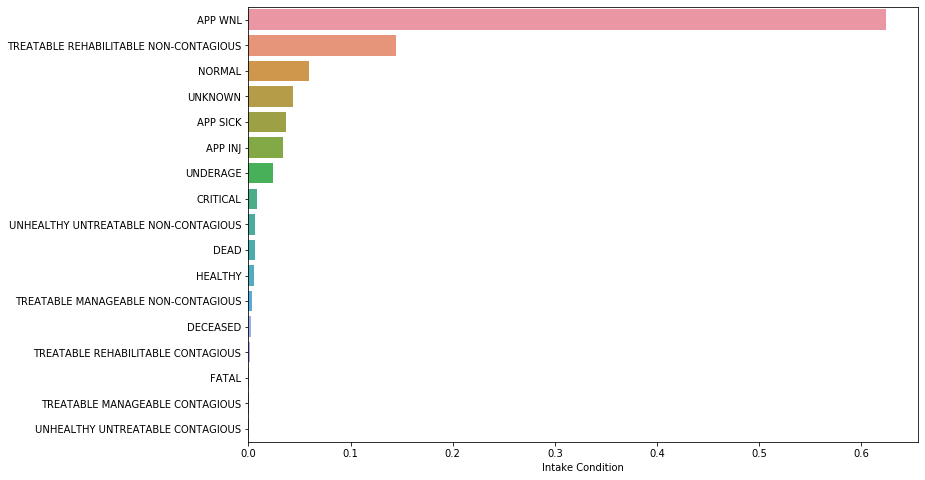

In [165]:
trace3 = df['Intake Condition'].value_counts(normalize=True)

sns.barplot(x = trace3, y=trace3.index, orient = 'h')

In [179]:
trace3

APP WNL                                   0.624285
TREATABLE REHABILITABLE NON-CONTAGIOUS    0.144301
NORMAL                                    0.058873
UNKNOWN                                   0.043445
APP SICK                                  0.036796
APP INJ                                   0.033559
UNDERAGE                                  0.023718
CRITICAL                                  0.008290
UNHEALTHY UNTREATABLE NON-CONTAGIOUS      0.006650
DEAD                                      0.006428
HEALTHY                                   0.005098
TREATABLE MANAGEABLE NON-CONTAGIOUS       0.003547
DECEASED                                  0.002704
TREATABLE REHABILITABLE CONTAGIOUS        0.001419
FATAL                                     0.000532
TREATABLE MANAGEABLE CONTAGIOUS           0.000222
UNHEALTHY UNTREATABLE CONTAGIOUS          0.000133
Name: Intake Condition, dtype: float64

Most animals (~62%) show up within normal limits. ~68% show up within normal limits or 'normal'. The second most popular category is 'Treatable Rehabilitable Non-Contagious', which most likely refers to routine injuries, cuts, bruises.

#### Segmenting by Animal (Cats)

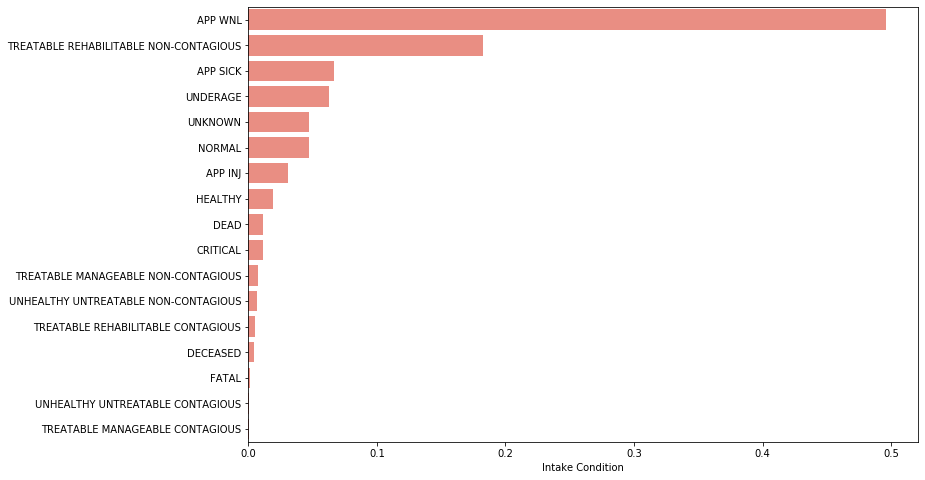

In [174]:
trace4 = df.loc[df['Animal Type'] == 'CAT']['Intake Condition'].value_counts(normalize=True)

sns.barplot(x = trace4, y=trace4.index, orient = 'h', color='salmon')

In [180]:
trace4

APP WNL                                   0.496208
TREATABLE REHABILITABLE NON-CONTAGIOUS    0.182578
APP SICK                                  0.066498
UNDERAGE                                  0.062415
UNKNOWN                                   0.047249
NORMAL                                    0.047054
APP INJ                                   0.030527
HEALTHY                                   0.019249
DEAD                                      0.011666
CRITICAL                                  0.011472
TREATABLE MANAGEABLE NON-CONTAGIOUS       0.007778
UNHEALTHY UNTREATABLE NON-CONTAGIOUS      0.006416
TREATABLE REHABILITABLE CONTAGIOUS        0.005444
DECEASED                                  0.004083
FATAL                                     0.000972
UNHEALTHY UNTREATABLE CONTAGIOUS          0.000194
TREATABLE MANAGEABLE CONTAGIOUS           0.000194
Name: Intake Condition, dtype: float64

Cats seem to arrive at the shelter in slightly worse condition. Only ~50% show up within normal limits, and approximately ~55% show up within normal limits or 'normal.'

#### Segmenting by Animal (Not Dogs or Cats)

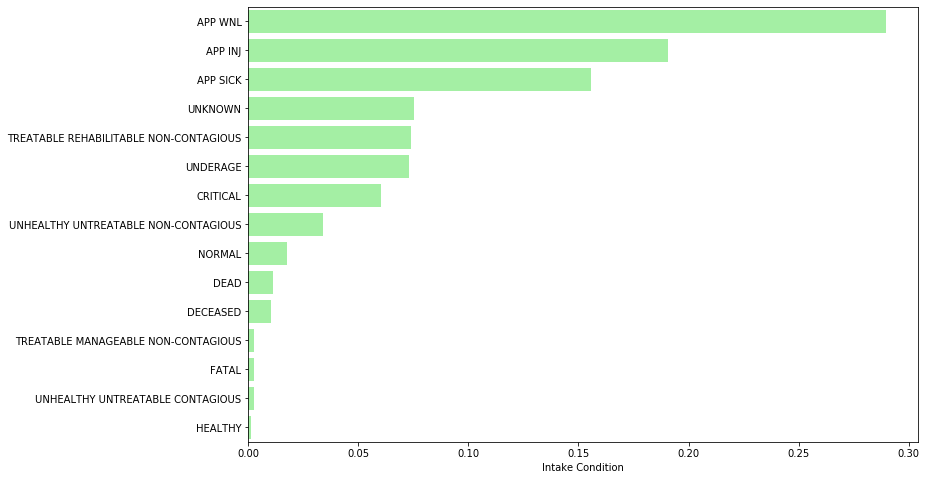

In [175]:
trace5 = df.loc[(df['Animal Type'] != 'CAT') & (df['Animal Type'] != 'DOG')]['Intake Condition'].value_counts(normalize=True)

sns.barplot(x = trace5, y=trace5.index, orient = 'h', color = 'palegreen')

In [177]:
trace5

APP WNL                                   0.289837
APP INJ                                   0.190715
APP SICK                                  0.155583
UNKNOWN                                   0.075282
TREATABLE REHABILITABLE NON-CONTAGIOUS    0.074028
UNDERAGE                                  0.072773
CRITICAL                                  0.060226
UNHEALTHY UNTREATABLE NON-CONTAGIOUS      0.033877
NORMAL                                    0.017566
DEAD                                      0.011292
DECEASED                                  0.010038
TREATABLE MANAGEABLE NON-CONTAGIOUS       0.002509
FATAL                                     0.002509
UNHEALTHY UNTREATABLE CONTAGIOUS          0.002509
HEALTHY                                   0.001255
Name: Intake Condition, dtype: float64

Birds, livestock, and wildlife show up in the worst condition when arriving at the animal shelter. Only ~30% show up within normal limits or 'normal.' That means 70% show up as injured, sick, deceased, or in critical condition. This tends to make sense since none of these animals are usually kept as pets, and therefore not taken for routine check-ups. If they show up to the shelter, it must usually be for a dire situation.

### Outcome Type

In [181]:
print('Total Outcome Types: ', len(df['Outcome Type'].unique()))
df['Outcome Type'].unique()

Total Outcome Types:  14


array(['RETURNED TO OWNER', 'DEAD ON ARRIVAL', 'TRANSFER', 'DIED',
       'EUTHANIZED', 'ADOPTION', 'WILDLIFE', 'FOSTER', 'TREATMENT',
       'LOST EXP', 'FOUND EXP', 'MISSING', 'OTHER', 'DISPOSAL'],
      dtype=object)

In [182]:
outcome_freq = df['Outcome Type'].value_counts()
outcome_freq

ADOPTION             7469
RETURNED TO OWNER    5273
TRANSFER             3191
FOSTER               2216
EUTHANIZED           1534
LOST EXP              862
TREATMENT             843
OTHER                 332
FOUND EXP             249
WILDLIFE              207
DIED                  195
DEAD ON ARRIVAL       153
DISPOSAL               20
MISSING                13
Name: Outcome Type, dtype: int64

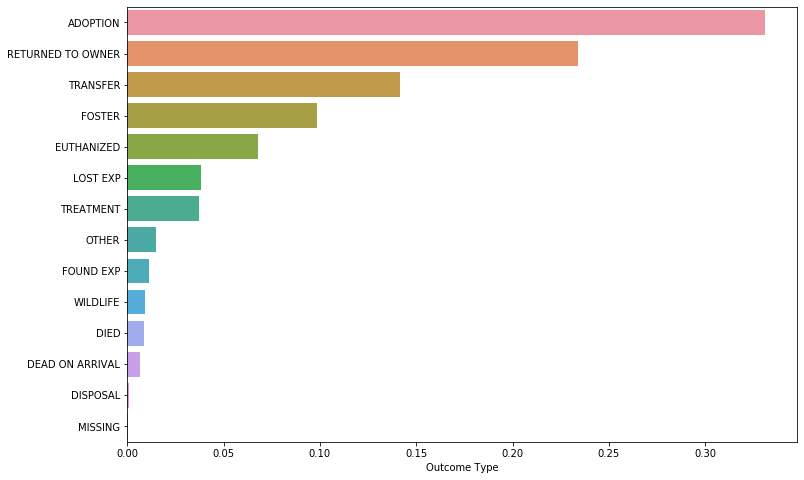

In [183]:
trace6 = df['Outcome Type'].value_counts(normalize=True)

sns.barplot(x = trace6, y=trace6.index, orient = 'h')

In [184]:
trace6

ADOPTION             0.331117
RETURNED TO OWNER    0.233763
TRANSFER             0.141464
FOSTER               0.098240
EUTHANIZED           0.068005
LOST EXP             0.038214
TREATMENT            0.037372
OTHER                0.014718
FOUND EXP            0.011039
WILDLIFE             0.009177
DIED                 0.008645
DEAD ON ARRIVAL      0.006783
DISPOSAL             0.000887
MISSING              0.000576
Name: Outcome Type, dtype: float64

~33% of animals entering the shelter end being adopted. This is slightly misleading however, since not all animals that show up to the shelter are eligable for adoption. ~66% end up with an owner by the end of their stay (adoption, returned to owner, foster). Sadly, ~8% are either euthanized or die in captivity.